In [4]:
from google.colab import files
import pandas as pd
import io

# Ini akan memunculkan tombol untuk pilih file dari komputer
uploaded = files.upload()

# Membaca file yang dipilih
df = pd.read_csv(io.BytesIO(uploaded['silver_prices_data.csv']))

print("Data berhasil dimuat!")
df.head()


Saving silver_prices_data.csv to silver_prices_data.csv
Data berhasil dimuat!


,Date,Close,High,Low,Open,Volume
0,2011-01-24,27.318001,27.459999,26.955000,27.174999,168
1,2011-01-25,26.811001,26.950001,26.565001,26.915001,77
2,2011-01-26,27.132000,27.025000,26.684999,27.025000,49
3,2011-01-27,27.045000,27.684999,27.410000,27.684999,184
4,2011-01-28,27.934000,27.950001,26.504999,26.695000,64


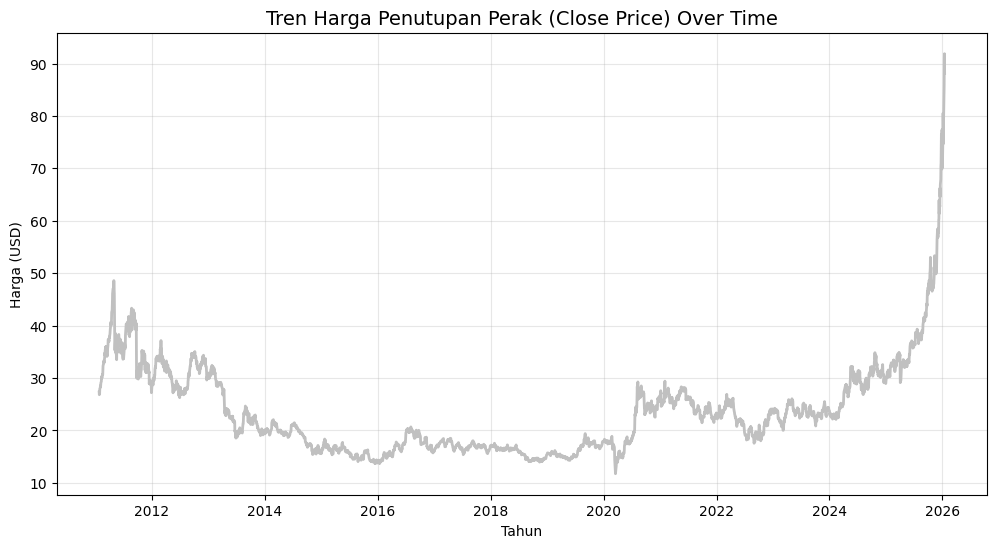

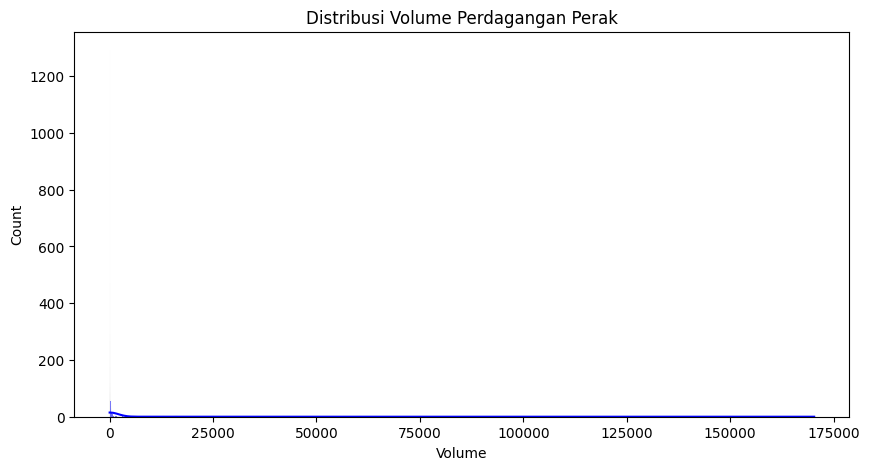

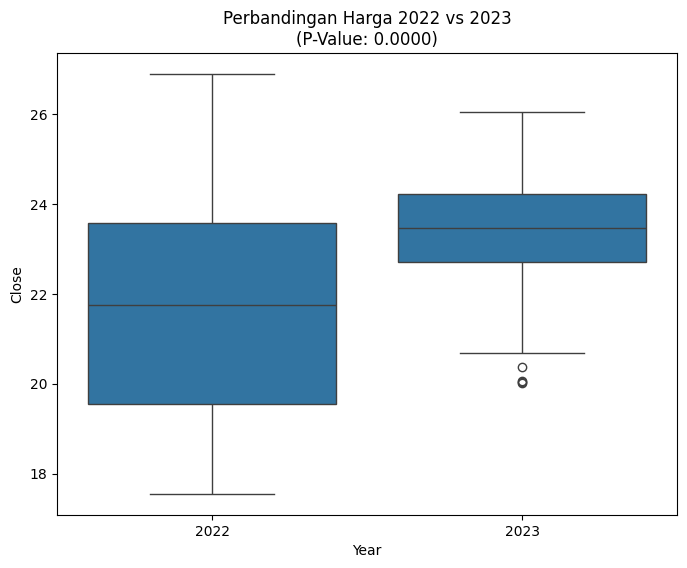

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Memuat Dataset
df = pd.read_csv('silver_prices_data.csv')

# Konversi kolom tanggal ke tipe datetime agar bisa diurutkan
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# --- [3] EDA: Tren Harga Perak ---
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='silver', linewidth=2)
plt.title('Tren Harga Penutupan Perak (Close Price) Over Time', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Harga (USD)')
plt.grid(True, alpha=0.3)
plt.show()

# --- [3] EDA: Distribusi Volume ---
plt.figure(figsize=(10, 5))
sns.histplot(df['Volume'], kde=True, color='blue')
plt.title('Distribusi Volume Perdagangan Perak')
plt.show()

# --- [7] Pengujian Hipotesis ---
# Hipotesis: Apakah rata-rata harga tahun 2023 lebih tinggi secara signifikan dibanding tahun 2022?
df['Year'] = df['Date'].dt.year
price_2022 = df[df['Year'] == 2022]['Close']
price_2023 = df[df['Year'] == 2023]['Close']

t_stat, p_val = stats.ttest_ind(price_2023, price_2022)

# Visualisasi Perbandingan untuk Hipotesis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Close', data=df[df['Year'].isin([2022, 2023])])
plt.title(f'Perbandingan Harga 2022 vs 2023\n(P-Value: {p_val:.4f})')
plt.show()